# **Tweets**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns
import string

data = pd.read_csv("/content/drive/MyDrive/DIC/Tweets/ukraine.csv")
# data = pd.read_csv("/content/drive/MyDrive/DIC/Tweets/trans_french.csv")
print(data.head())

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


                userid        username  \
0  1178751075479937024  AlcairoCrystal   
1  1425063388405768229    Alexdjibouti   
2  1495361614731747338        Treesdru   
3            189487213     vitalyshape   
4   934606906840244225    Max_Emeritus   

                                            acctdesc location  following  \
0  Mother of five, grandmother of three so far, w...      NaN      700.0   
1                                               Real      NaN      262.0   
2                                                NaN      NaN       41.0   
3  CEO Avinessi 💖\nAndroid iOS apps R&D 📲\nVP biz...      NaN     2491.0   
4                               Жизнь это как песок)  Украина      115.0   

  followers  totaltweets               usercreatedts       tweetid  \
0       459      68942.0  2019-09-30 19:19:07.000000  1.509683e+18   
1       118       5260.0  2021-08-10 11:56:31.000000  1.509683e+18   
2        15      14306.0  2022-02-20 11:36:34.000000  1.509684e+18   
3       50

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,5,10,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'extractedts', 'processed_text', 'translated'],
      dtype='object')

In [3]:
data.rename(columns = {'translated':'tweet'}, inplace = True)

In [4]:
data

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,processed_text,tweet
0,1178751075479937024,AlcairoCrystal,"Mother of five, grandmother of three so far, w...",NaN,700.0,459,68942.0,2019-09-30 19:19:07.000000,1.509683e+18,2022-04-01 00:04:53.000000,4,"In #Kherson region, we have liberated the foll...","[{'text': 'Kherson', 'indices': [24, 32]}]",uk,NaN,0,2022-04-01 00:31:35.418854,"In region, we have liberated the following vil...","In region, we have liberated the following vil..."
1,1425063388405768229,Alexdjibouti,Real,NaN,262.0,118,5260.0,2021-08-10 11:56:31.000000,1.509683e+18,2022-04-01 00:05:38.000000,183,Хроніка 3️⃣6️⃣ дня героїчного протистояння укр...,"[{'text': 'stoprussia', 'indices': [124, 135]}]",uk,NaN,0,2022-04-01 00:44:16.942474,Хроніка 3️⃣6️⃣ дня героїчного протистояння укр...,Chronicle of the 3rd and 6th days of the heroi...
2,1495361614731747338,Treesdru,NaN,NaN,41.0,15,14306.0,2022-02-20 11:36:34.000000,1.509684e+18,2022-04-01 00:08:34.000000,158,"Вони гірші за фашистів, я три війни бачила - в...","[{'text': 'UkraineRussiaWar', 'indices': [84, ...",uk,NaN,0,2022-04-01 00:14:06.839668,"Вони гірші за фашистів, я три війни бачила - в...","They are worse than the Nazis, I have seen thr..."
3,189487213,vitalyshape,CEO Avinessi 💖\nAndroid iOS apps R&D 📲\nVP biz...,NaN,2491.0,506,4928.0,2010-09-11 11:52:49.000000,1.509685e+18,2022-04-01 00:11:33.000000,2,"Усі освічені люди розуміють, що не існує ніяко...",[],uk,NaN,0,2022-04-01 00:24:28.698788,"Усі освічені люди розуміють, що не існує ніяко...",All educated people understand that there is n...
4,934606906840244225,Max_Emeritus,Жизнь это как песок),Украина,115.0,7,240.0,2017-11-26 02:17:05.000000,1.509685e+18,2022-04-01 00:12:17.000000,158,"Вони гірші за фашистів, я три війни бачила - в...","[{'text': 'UkraineRussiaWar', 'indices': [84, ...",uk,NaN,0,2022-04-01 00:14:00.321991,"Вони гірші за фашистів, я три війни бачила - в...","They are worse than the Nazis, I have seen thr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99797,1116324379762266112,DniproUkraina,NaN,NaN,15.0,9,8630.0,2019-04-11 12:57:27.000000,1.509677e+18,2022-03-31 23:40:19.000000,171,Хроніка 3️⃣6️⃣ дня героїчного протистояння укр...,"[{'text': 'stoprussia', 'indices': [124, 135]}]",uk,NaN,0,2022-03-31 23:44:02.643402,Хроніка 3️⃣6️⃣ дня героїчного протистояння укр...,Chronicle of the 3rd and 6th days of the heroi...
99798,178492884,jjqb1,Argentino. RT no significa avalar o consentir....,"Ciudad Autónoma de Buenos Aires, Argentina",804.0,634,162650.0,2010-08-14 22:47:20.000000,1.509677e+18,2022-03-31 23:40:54.000000,171,Хроніка 3️⃣6️⃣ дня героїчного протистояння укр...,"[{'text': 'stoprussia', 'indices': [124, 135]}]",uk,NaN,0,2022-03-31 23:44:01.934315,Хроніка 3️⃣6️⃣ дня героїчного протистояння укр...,Chronicle of the 3rd and 6th days of the heroi...
99799,1949653592,AugustaAndarta,Historian @ Fnord Industries. Here for animal ...,"Woods, lovely, dark, deep.",1931.0,1202,9780.0,2013-10-09 16:42:06.000000,1.509677e+18,2022-03-31 23:41:46.000000,0,@mfa_russia @UN @Rusembchina @RusEmbIran @RusE...,"[{'text': 'StandWithUkraine', 'indices': [140,...",uk,NaN,0,2022-03-31 23:44:01.033672,🇺🇦 Слава Україні! Героям слава! 🇺🇦,🇺🇦 Glory to Ukraine! Glory to heroes! 🇺🇦
99800,1949653592,AugustaAndarta,Historian @ Fnord Industries. Here for animal ...,"Woods, lovely, dark, deep.",1931.0,1202,9780.0,2013-10-09 16:42:06.000000,1.509677e+18,2022-03-31 23:42:05.000000,0,@mfa_russia @RusEmbassyKabul @USEmbassyKabul @...,"[{'text': 'StandWithUkraine', 'indices': [130,...",uk,NaN,0,2022-03-31 23:44:00.680629,🇺🇦 Слава Україні! Героям слава! 🇺🇦,🇺🇦 Glory to Ukraine! Glory to heroes! 🇺🇦


In [5]:
data = data[["username", "tweet", "language"]]
data.isnull().sum()
data["language"].value_counts()

uk    99800
0         1
Name: language, dtype: int64

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


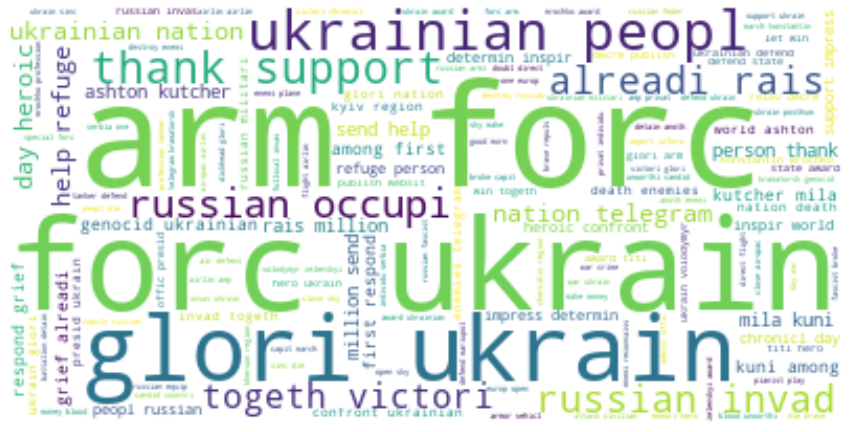

In [7]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


                                               tweet  Positive  Negative  \
0  region liber follow villag нововоронцовка litt...     0.163     0.000   
1  chronicl   day heroic confront ukrainian peopl...     0.252     0.119   
2  wors nazi seen three war  wors german grandma ...     0.000     0.425   
3  educ peopl understand sovereignti ldnr part tw...     0.070     0.130   
4  wors nazi seen three war  wors german grandma ...     0.000     0.425   

   Neutral  
0    0.837  
1    0.629  
2    0.575  
3    0.800  
4    0.575  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
data.describe()

,Positive,Negative,Neutral
count,99802.000000,99802.000000,99802.000000
mean,0.110363,0.150340,0.739192
std,0.140719,0.164342,0.186001
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.602000
50%,0.000000,0.111000,0.723000
75%,0.209000,0.251000,0.897000
max,1.000000,1.000000,1.000000


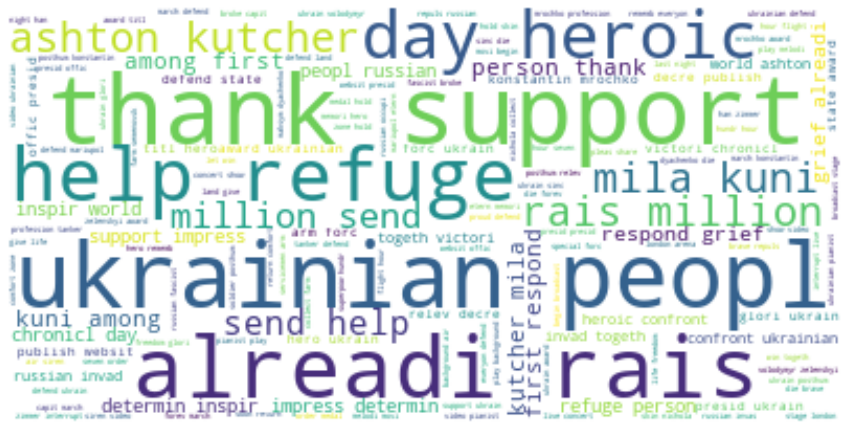

In [10]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

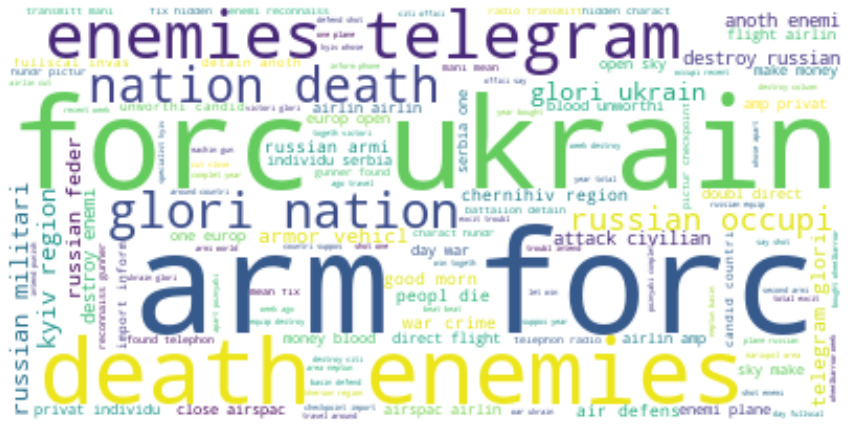

In [11]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()